Number of ships to generate : 2000
Number of ships is 2000
Average time of a ship in the harbor is 104
Maximum time of a ship in the harbor is 322
Average waiting time of a ship is 35
Maximum waiting time of a ship is 242


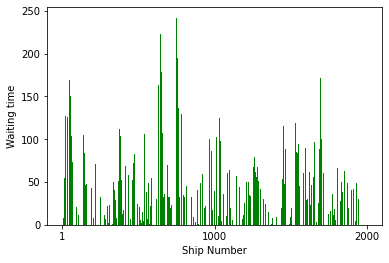

In [5]:
import random
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


N = int(input("Number of ships to generate : "))                                     

def random_between_time():                          
    x = random.random()
    if x >= 0.997:
        b = 5000*x-4855
        count_between[12] = count_between[12]+1
    elif x >= 0.980:
        b = 588.2*x-456.4706
        count_between[11] = count_between[11]+1
    elif x >= 0.943:
        b = 270.3*x-144.8649
        count_between[10] = count_between[10]+1
    elif x >= 0.872:
        b = 140.8*x-22.8169
        count_between[9] = count_between[9]+1
    elif x >= 0.747:
        b = 80*x+30.24
        count_between[8] = count_between[8]+1
    elif x >= 0.575:
        b = 58.1*x+46.5698
        count_between[7] = count_between[7]+1
    elif x >= 0.375:
        b = 50*x+51.25
        count_between[6] = count_between[6]+1
    elif x >= 0.214:
        b = 62.1*x+46.7080
        count_between[5] = count_between[5]+1
    elif x >= 0.124:
        b = 111.1*x+36.2222
        count_between[4] = count_between[4]+1
    elif x >= 0.073:
        b = 196.1*x+25.6863
        count_between[3] = count_between[3]+1
    elif x >= 0.038:
        b = 285.7*x+19.1429
        count_between[2] = count_between[2]+1
    elif x >= 0.009:
        b = 344.8*x+16.8966
        count_between[1] = count_between[1]+1
    else:
        b = 555.6*x+15
        count_between[0] = count_between[0]+1
    return b


def random_unload_time():
    x = random.random()
    if x >= 0.909:
        u = 82.41*x+7.582
        count_unload[8] = count_unload[8]+1
    elif x >= 0.766:
        u = 35*x+50.717
        count_unload[7] = count_unload[7]+1
    elif x >= 0.558:
        u = 24*x+59.087
        count_unload[6] = count_unload[6]+1
    elif x >= 0.373:
        u = 27*x+57.419
        count_unload[5] = count_unload[5]+1
    elif x >= 0.243:
        u = 38.46*x+53.154
        count_unload[4] = count_unload[4]+1
    elif x >= 0.157:
        u = 58*x+48.372
        count_unload[3] = count_unload[3]+1
    elif x >= 0.062:
        u = 53*x+49.237
        count_unload[2] = count_unload[2]+1
    elif x >= 0.017:
        u = 111*x+45.611
        count_unload[1] = count_unload[1]+1
    else:
        u = 147*x+45
        count_unload[0] = count_unload[0]+1
    return u

between = [0]*N
arrive = [0]*N
unload = [0]*N
start = [0]*N
idle = [0]*N
wait = [0]*N
finish = [0]*N
harbor = [0]*N
count_between = [0]*13
count_unload = [0]*9

between[0] = random_between_time()
unload[0] = random_unload_time()
arrive[0] = between[0]
HARTIME = unload[0]
MAXHAR = unload[0]
WAITIME = 0
MAXWAIT = 0
IDLETIME = arrive[0]
finish[0] = arrive[0]+unload[0]

for i in range(1,N):
    between[i] = random_between_time()
    unload[i] = random_unload_time()
    arrive[i] = arrive[i-1]+between[i]
    timediff = arrive[i]-finish[i-1]
    if timediff >= 0:
        idle[i] = timediff
        wait[i] = 0
    else:
        idle[i] = 0
        wait[i] = -1*timediff
    start[i] = arrive[i] + wait[i]
    finish[i] = start[i] + unload[i]
    harbor[i] = wait[i] + unload[i]
    HARTIME = HARTIME + harbor[i]
    if harbor[i] > MAXHAR:
        MAXHAR = harbor[i]
    WAITIME = WAITIME + wait[i]
    IDLETIME = IDLETIME + idle[i]
    if wait[i] > MAXWAIT:
        MAXWAIT = wait[i]
        
HARTIME = HARTIME/N
WAITIME = WAITIME/N

# print simulation results
print("Number of ships is %d" %N)
print("Average time of a ship in the harbor is %d" %HARTIME)
print("Maximum time of a ship in the harbor is %d" %MAXHAR)
print("Average waiting time of a ship is %d" %WAITIME)
print("Maximum waiting time of a ship is %d" %MAXWAIT)


count_wait = [0]*10
step_wait = MAXWAIT/10

for i in wait:
    if i >= MAXWAIT-step_wait:
        count_wait[9] = count_wait[9]+1
    elif i >= MAXWAIT-step_wait*2:
        count_wait[8] = count_wait[8]+1
    elif i >= MAXWAIT-step_wait*3:
        count_wait[7] = count_wait[7]+1
    elif i >= MAXWAIT-step_wait*4:
        count_wait[6] = count_wait[6]+1
    elif i >= MAXWAIT-step_wait*5:
        count_wait[5] = count_wait[5]+1
    elif i >= MAXWAIT-step_wait*6:
        count_wait[4] = count_wait[4]+1
    elif i >= MAXWAIT-step_wait*7:
        count_wait[3] = count_wait[3]+1
    elif i >= MAXWAIT-step_wait*8:
        count_wait[2] = count_wait[2]+1
    elif i >= MAXWAIT-step_wait*9:
        count_wait[1] = count_wait[1]+1
    else:
        count_wait[0] = count_wait[0]+1
       
    
# plot waiting time for each ship

fig, ax = plt.subplots()
queue_number = range(1,N+1)
x_pos = N
y = []
for i in wait:
    y.append(int(i))

ax.bar(queue_number, y , align='center',color='green')
ax.set_xticks([1,int(N/2),N])
ax.set_xticklabels([1,int(N/2),N])
ax.set_ylabel('Waiting time')
ax.set_xlabel('Ship Number')

plt.savefig('waiting.eps', format='eps')

plt.show()